In [ ]:
from google.colab import files
uploaded=files.upload()

!unzip ml-100k.zip  # To unzip the dataset


Saving ml-100k.zip to ml-100k.zip
Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [ ]:
import pandas as pd

# Load ratings data
ratings=pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
# Load movies data
movies=pd.read_csv('ml-100k/u.item', sep='|', encoding='ISO-8859-1', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], usecols=range(24))

print(ratings.head())
print(movies.head())


   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0    

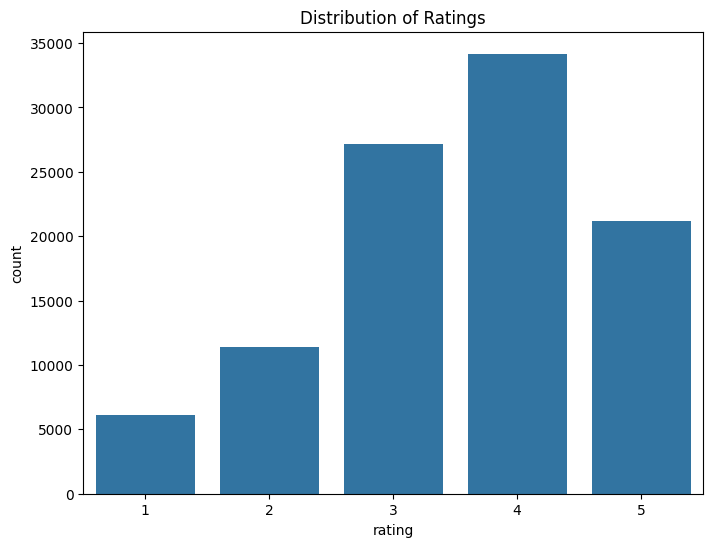

                           title  counts
0               Star Wars (1977)     583
1                 Contact (1997)     509
2                   Fargo (1996)     508
3      Return of the Jedi (1983)     507
4               Liar Liar (1997)     485
5    English Patient, The (1996)     481
6                  Scream (1996)     478
7               Toy Story (1995)     452
8           Air Force One (1997)     431
9  Independence Day (ID4) (1996)     429


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.show()

# Top 10 movies by number of ratings
top_movies=ratings['movie_id'].value_counts().head(10)
top_movies=pd.DataFrame({'movie_id': top_movies.index, 'counts': top_movies.values})
top_movies=top_movies.merge(movies, on='movie_id', how='left')
print(top_movies[['title', 'counts']])


In [ ]:
#Checking missing values
print(ratings.isnull().sum())
print(movies.isnull().sum())

# Rrating should be between 1 and 5
ratings=ratings[(ratings['rating'] >= 1) & (ratings['rating'] <= 5)]


user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64
movie_id                 0
title                    0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64


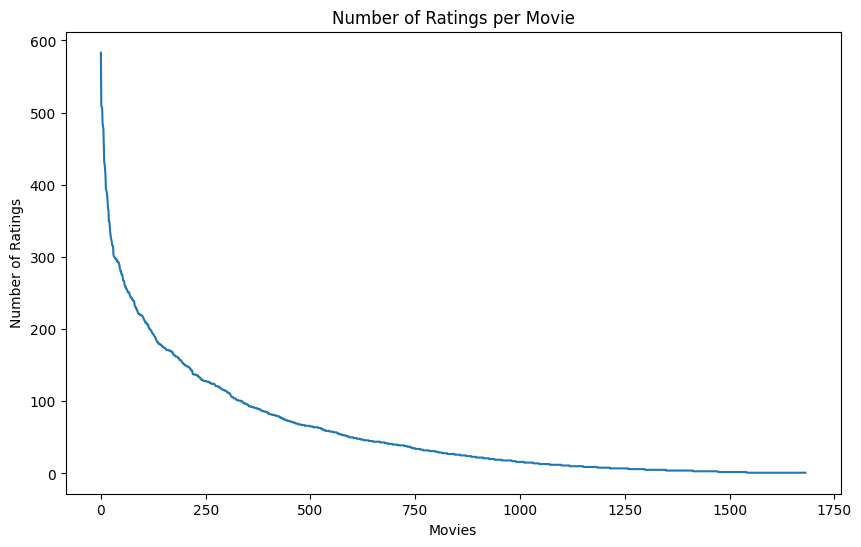

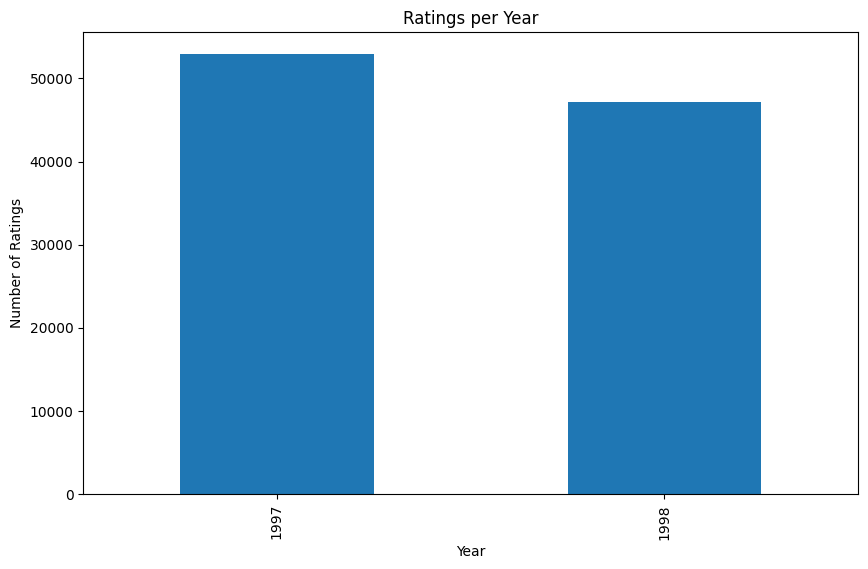

In [ ]:
# Number of ratings per movie
ratings_per_movie=ratings['movie_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(ratings_per_movie.values)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movies')
plt.ylabel('Number of Ratings')
plt.show()

# Ratings over time
ratings['datetime']=pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year']=ratings['datetime'].dt.year
yearly_ratings=ratings.groupby('year').size()
plt.figure(figsize=(10, 6))
yearly_ratings.plot(kind='bar')
plt.title('Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


In [ ]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
!pip install findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark=SparkSession.builder.master("local[*]").appName("Movie Recommendation").getOrCreate()

In [ ]:
# Assuming the data files have been uploaded and extracted
from pyspark.sql.types import IntegerType, StructType, StructField

# Define schema for ratings data
schema=StructType([
    StructField("user_id", IntegerType(), True),
    StructField("movie_id", IntegerType(), True),
    StructField("rating", IntegerType(), True),
    StructField("timestamp", IntegerType(), True)
])

# Load ratings data directly into PySpark DataFrame using defined schema
ratings_df=spark.read.csv('/content/ml-100k/u.data', schema=schema, sep='\t')
ratings_df.show(5)


+-------+--------+------+---------+
|user_id|movie_id|rating|timestamp|
+-------+--------+------+---------+
|    196|     242|     3|881250949|
|    186|     302|     3|891717742|
|     22|     377|     1|878887116|
|    244|      51|     2|880606923|
|    166|     346|     1|886397596|
+-------+--------+------+---------+
only showing top 5 rows



In [ ]:
# Defining ALS model and train it
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

als=ALS(maxIter=5, regParam=0.01, userCol="user_id", itemCol="movie_id", ratingCol="rating", coldStartStrategy="drop", nonnegative=True)
model=als.fit(ratings_df)

In [ ]:
# Evaluating the model
(training, test)=ratings_df.randomSplit([0.8, 0.2])
predictions=model.transform(test)
evaluator=RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse=evaluator.evaluate(predictions)
print("Root-mean-square error=" + str(rmse))

Root-mean-square error = 0.7458458582472202


In [ ]:
# Save the model
model.save("/content/drive/MyDrive/movie_recommender_model")

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# Schema definition for the movies data
movies_schema=StructType([
    StructField("movie_id", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("genres", StringType(), True)  # Genres are concatenated in one column
])

# Now, read the movies data with the schema
movies_df=spark.read.csv('/content/ml-100k/u.item', schema=movies_schema, sep='|', encoding='ISO-8859-1')
movies_df.show(5)


+--------+-----------------+-----------+
|movie_id|            title|     genres|
+--------+-----------------+-----------+
|       1| Toy Story (1995)|01-Jan-1995|
|       2| GoldenEye (1995)|01-Jan-1995|
|       3|Four Rooms (1995)|01-Jan-1995|
|       4|Get Shorty (1995)|01-Jan-1995|
|       5|   Copycat (1995)|01-Jan-1995|
+--------+-----------------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col, udf, split
from pyspark.sql.types import StringType, ArrayType
from pyspark.ml.feature import CountVectorizer

# movies_df is loaded correctly with 'genres' as a single string
# Checking the current schema to confirm the data types
movies_df.printSchema()

# If 'genres' is not an array, split it into an array
if isinstance(movies_df.schema["genres"].dataType, StringType):
    movies_df=movies_df.withColumn("genres", split(col("genres"), "\|"))

# Ensure there are no null or empty genre arrays
fix_empty_genres=udf(lambda x: x if x and len(x) > 0 else ["unknown"], ArrayType(StringType()))
movies_df=movies_df.withColumn("genres", fix_empty_genres(col("genres")))

# Vectorize the genres
vectorizer=CountVectorizer(inputCol="genres", outputCol="genre_features")
model=vectorizer.fit(movies_df)
movies_df=model.transform(movies_df)

# Show the transformed DataFrame
movies_df.select("movie_id", "title", "genre_features").show(5, truncate=False)


root
 |-- movie_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: array (nullable = true)
 |    |-- element: string (containsNull = true)

+--------+-----------------+---------------+
|movie_id|title            |genre_features |
+--------+-----------------+---------------+
|1       |Toy Story (1995) |(241,[0],[1.0])|
|2       |GoldenEye (1995) |(241,[0],[1.0])|
|3       |Four Rooms (1995)|(241,[0],[1.0])|
|4       |Get Shorty (1995)|(241,[0],[1.0])|
|5       |Copycat (1995)   |(241,[0],[1.0])|
+--------+-----------------+---------------+
only showing top 5 rows



In [ ]:
# Join ratings with movies to get genre features along with ratings
data_model=ratings_df.join(movies_df, "movie_id").select("user_id", "movie_id", "rating", "genre_features")
data_model.show(5)


+-------+--------+------+----------------+
|user_id|movie_id|rating|  genre_features|
+-------+--------+------+----------------+
|    196|     242|     3|(241,[69],[1.0])|
|    186|     302|     3| (241,[3],[1.0])|
|     22|     377|     1| (241,[1],[1.0])|
|    244|      51|     2| (241,[1],[1.0])|
|    166|     346|     1| (241,[3],[1.0])|
+-------+--------+------+----------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

# Define and train the ALS model
als=ALS(maxIter=10, regParam=0.1, userCol="user_id", itemCol="movie_id", ratingCol="rating", coldStartStrategy="drop")
model=als.fit(data_model)

# Predict ratings
predictions=model.transform(data_model)
predictions.show(5)


+-------+--------+------+----------------+----------+
|user_id|movie_id|rating|  genre_features|prediction|
+-------+--------+------+----------------+----------+
|    196|     242|     3|(241,[69],[1.0])|   3.75477|
|    186|     302|     3| (241,[3],[1.0])| 3.2611845|
|     22|     377|     1| (241,[1],[1.0])| 1.0592835|
|    244|      51|     2| (241,[1],[1.0])| 3.4003916|
|    166|     346|     1| (241,[3],[1.0])| 2.2289593|
+-------+--------+------+----------------+----------+
only showing top 5 rows



In [ ]:
# Evaluate the model
evaluator=RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse=evaluator.evaluate(predictions)
print(f"Root-mean-square error={rmse}")


Root-mean-square error = 0.7725018565282938


In [ ]:
# Add a content score to the predictions DataFrame for demonstration purposes
# This could be a more complex computation in practice
predictions=predictions.withColumn("content_score", col("prediction"))  # Placeholder for content score


In [ ]:
from pyspark.sql.functions import col

# Adjust the weights as necessary to optimize performance
# Ensure both 'prediction' and 'content_score' are defined in the DataFrame
hybrid_predictions=predictions.withColumn("final_score", (col("prediction") * 0.7 + col("content_score") * 0.3))
hybrid_predictions.select("user_id", "movie_id", "final_score").show(5)


+-------+--------+------------------+
|user_id|movie_id|       final_score|
+-------+--------+------------------+
|    196|     242|3.7547700405120845|
|    186|     302| 3.261184453964233|
|     22|     377|1.0592834949493408|
|    244|      51|3.4003915786743164|
|    166|     346| 2.228959321975708|
+-------+--------+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col

# Assuming 'model' is your trained ALS model
predictions=model.transform(data_model)

# Add a content score to the predictions DataFrame for demonstration purposes
# In practice, replace this with your actual content-based scoring logic
predictions=predictions.withColumn("content_score", col("prediction"))  # Placeholder for content score

# Calculate a hybrid score by combining content and collaborative filtering scores
hybrid_predictions=predictions.withColumn("final_score", (col("prediction") * 0.7 + col("content_score") * 0.3))
hybrid_predictions.select("user_id", "movie_id", "final_score").show(5)

# Now you can evaluate the hybrid_predictions if needed or use them for making recommendations


+-------+--------+------------------+
|user_id|movie_id|       final_score|
+-------+--------+------------------+
|    196|     242|3.7547700405120845|
|    186|     302| 3.261184453964233|
|     22|     377|1.0592834949493408|
|    244|      51|3.4003915786743164|
|    166|     346| 2.228959321975708|
+-------+--------+------------------+
only showing top 5 rows



In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming 'data_model' is your Spark DataFrame containing user_id, movie_id, and ratings
pandas_df=data_model.toPandas()

# Prepare dataset for TensorFlow
user_ids=pandas_df[['user_id']].values.astype('int32')
movie_ids=pandas_df[['movie_id']].values.astype('int32')
ratings=pandas_df[['rating']].values.astype('float32')

# Split data
user_train, user_test, movie_train, movie_test, rating_train, rating_test=train_test_split(user_ids, movie_ids, ratings, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

# Number of latent factors
n_latent_factors=50

# Input layers
user_input=Input(shape=(1,), name='user_input', dtype='int32')
item_input=Input(shape=(1,), name='item_input', dtype='int32')

# Embedding layers
user_embedding=Embedding(input_dim=pandas_df['user_id'].max() + 1, output_dim=n_latent_factors, name='user_embedding')(user_input)
item_embedding=Embedding(input_dim=pandas_df['movie_id'].max() + 1, output_dim=n_latent_factors, name='item_embedding')(item_input)

# Flatten the embeddings
user_vec=Flatten(name='flatten_users')(user_embedding)
item_vec=Flatten(name='flatten_items')(item_embedding)

# Concatenate the embeddings (could use dot product instead)
concat=Concatenate()([user_vec, item_vec])

# Fully connected layers
fc1=Dense(128, activation='relu')(concat)
fc2=Dense(32, activation='relu')(fc1)
output=Dense(1, activation='linear')(fc2)

# Create and compile model
model=Model([user_input, item_input], output)
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Model summary
model.summary()

# Train model
model.fit([user_train, movie_train], rating_train, validation_data=([user_test, movie_test], rating_test), epochs=5, verbose=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 item_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 50)                47200     ['user_input[0][0]']          
                                                                                                  
 item_embedding (Embedding)  (None, 1, 50)                84150     ['item_input[0][0]']          
                                                                                              

In [ ]:
# Evaluate the model
test_loss=model.evaluate([user_test, movie_test], rating_test)
print(f'Test MSE: {test_loss}')


625/625 [==============================] - 2s 4ms/step - loss: 0.8599
Test MSE: 0.859893262386322


In [ ]:
# Print the schema to see the data types
movies_df.printSchema()


root
 |-- movie_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- genre_features: vector (nullable = true)



In [ ]:
from pyspark.ml.feature import CountVectorizer

# Check if the column 'genre_features' already exists, and if so, create a new one
if "genre_features" in movies_df.columns:
    print("Column 'genre_features' already exists. Choosing a new name for output column.")
    output_column_name="genre_features_new"
else:
    output_column_name="genre_features"

# Configure CountVectorizer with a new output column name to avoid conflicts
vectorizer=CountVectorizer(inputCol="genres", outputCol=output_column_name)
model=vectorizer.fit(movies_df)
movies_df=model.transform(movies_df)

# Display the transformed DataFrame to verify the new genre features
movies_df.select("movie_id", "title", output_column_name).show(truncate=False)


Column 'genre_features' already exists. Choosing a new name for output column.
+--------+----------------------------------------------------+------------------+
|movie_id|title                                               |genre_features_new|
+--------+----------------------------------------------------+------------------+
|1       |Toy Story (1995)                                    |(241,[0],[1.0])   |
|2       |GoldenEye (1995)                                    |(241,[0],[1.0])   |
|3       |Four Rooms (1995)                                   |(241,[0],[1.0])   |
|4       |Get Shorty (1995)                                   |(241,[0],[1.0])   |
|5       |Copycat (1995)                                      |(241,[0],[1.0])   |
|6       |Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|(241,[0],[1.0])   |
|7       |Twelve Monkeys (1995)                               |(241,[0],[1.0])   |
|8       |Babe (1995)                                         |(241,[0],[1.0])   |
|9      

In [ ]:
# Display existing 'genre_features' to understand what's currently stored
movies_df.select("movie_id", "title", "genre_features").show(truncate=False)


+--------+----------------------------------------------------+-----------------+
|movie_id|title                                               |genre_features   |
+--------+----------------------------------------------------+-----------------+
|1       |Toy Story (1995)                                    |(241,[0],[1.0])  |
|2       |GoldenEye (1995)                                    |(241,[0],[1.0])  |
|3       |Four Rooms (1995)                                   |(241,[0],[1.0])  |
|4       |Get Shorty (1995)                                   |(241,[0],[1.0])  |
|5       |Copycat (1995)                                      |(241,[0],[1.0])  |
|6       |Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|(241,[0],[1.0])  |
|7       |Twelve Monkeys (1995)                               |(241,[0],[1.0])  |
|8       |Babe (1995)                                         |(241,[0],[1.0])  |
|9       |Dead Man Walking (1995)                             |(241,[0],[1.0])  |
|10      |Richar

In [ ]:
from pyspark.sql.functions import first

# Group by movie_id and aggregate genre vectors
movies_aggregated=movies_df.groupBy("movie_id").agg(first(output_column_name).alias("genre_features"))
movies_aggregated.show(5, truncate=False)


+--------+---------------+
|movie_id|genre_features |
+--------+---------------+
|1       |(241,[0],[1.0])|
|2       |(241,[0],[1.0])|
|3       |(241,[0],[1.0])|
|4       |(241,[0],[1.0])|
|5       |(241,[0],[1.0])|
+--------+---------------+
only showing top 5 rows



In [ ]:
# Assuming 'ratings_df' is your DataFrame containing user ratings
full_data=ratings_df.join(movies_aggregated, on="movie_id", how="inner")
full_data.show(5, truncate=False)


+--------+-------+------+---------+----------------+
|movie_id|user_id|rating|timestamp|genre_features  |
+--------+-------+------+---------+----------------+
|242     |196    |3     |881250949|(241,[69],[1.0])|
|302     |186    |3     |891717742|(241,[3],[1.0]) |
|377     |22     |1     |878887116|(241,[1],[1.0]) |
|51      |244    |2     |880606923|(241,[1],[1.0]) |
|346     |166    |1     |886397596|(241,[3],[1.0]) |
+--------+-------+------+---------+----------------+
only showing top 5 rows



In [ ]:
# Convert to Pandas DataFrame for use in TensorFlow or similar
full_data_pd=full_data.toPandas()

# Alternatively, you can directly work with PySpark MLlib to train models within the Spark environment


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate

# Assuming max IDs for embeddings
num_users=full_data_pd['user_id'].max() + 1
num_movies=full_data_pd['movie_id'].max() + 1
genre_dim=len(full_data_pd['genre_features'][0])

# Inputs
user_input=Input(shape=(1,), name='user_input')
movie_input=Input(shape=(1,), name='movie_input')
genre_input=Input(shape=(genre_dim,), name='genre_input')

# Embeddings
user_embedding=Embedding(num_users, 8, input_length=1)(user_input)
movie_embedding=Embedding(num_movies, 8, input_length=1)(movie_input)

# Flatten the embeddings
user_vec=Flatten()(user_embedding)
movie_vec=Flatten()(movie_embedding)

# Concatenate features
concat=Concatenate()([user_vec, movie_vec, genre_input])

# Fully connected layers
fc1=Dense(128, activation='relu')(concat)
output=Dense(1, activation='linear')(fc1)

# Compile and train the model
model=Model(inputs=[user_input, movie_input, genre_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Prepare data for training
train_features={
    'user_input': full_data_pd['user_id'],
    'movie_input': full_data_pd['movie_id'],
    'genre_input': np.stack(full_data_pd['genre_features'].values)
}

# Train the model
model.fit(train_features, full_data_pd['rating'], epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
2813/2813 [==============================] - 10s 3ms/step - loss: 1.2389 - val_loss: 0.9098
Epoch 2/5
2813/2813 [==============================] - 9s 3ms/step - loss: 0.8992 - val_loss: 0.9041
Epoch 3/5
2813/2813 [==============================] - 10s 4ms/step - loss: 0.8848 - val_loss: 0.8990
Epoch 4/5
2813/2813 [==============================] - 9s 3ms/step - loss: 0.8659 - val_loss: 0.8774
Epoch 5/5
2813/2813 [==============================] - 9s 3ms/step - loss: 0.8418 - val_loss: 0.8702


In [ ]:
# Evaluate the model on a test set
model.evaluate(train_features, full_data_pd['rating'])


3125/3125 [==============================] - 8s 3ms/step - loss: 0.8059


0.8059421181678772

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162998 sha256=7be1952eadbe0c99c6fee19b946aee257b7c8fca06d2e6064f2189e144a9e06c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse, mae

# Loading the data into Surprise's format
reader=Reader(rating_scale=(1, 5))  # Adjust rating_scale if your dataset differs
data=Dataset.load_from_df(full_data_pd[['user_id', 'movie_id', 'rating']], reader)

# Split the data into train and test sets for evaluation
trainset, testset=train_test_split(data, test_size=0.25)

# Defining the SVD algorithm
svd_model=SVD(n_factors=100, n_epochs=20, biased=True, lr_all=0.005, reg_all=0.02, verbose=True)

# Training the SVD model
svd_model.fit(trainset)

# Predictions on the test set
predictions=svd_model.test(testset)

# Compute RMSE (Root Mean Squared Error)
accuracy_rmse=rmse(predictions)

# Optionally, you can use cross-validation to evaluate the model further
results=cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(results['test_rmse'].mean())
print(results['test_mae'].mean())


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.9385
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 

In [ ]:
# Tuning hyperparameters to improve accuracy
from surprise.model_selection import GridSearchCV

# Define a range of hyperparameters for SVD
param_grid={
    'n_epochs': [5, 10, 20],  # Number of iteration of the SGD procedure
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate
    'reg_all': [0.02, 0.1, 0.2]  # Regularization term
}

# Setup GridSearchCV
gs=GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

# Fit GridSearchCV to the data
gs.fit(data)

# Best RMSE score
print(f"Best RMSE score attained: {gs.best_score['rmse']}")

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


Best RMSE score attained: 0.9288940172065311
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}


In [ ]:
# Retrain the model with the best parameters
optimized_svd=SVD(n_epochs=gs.best_params['rmse']['n_epochs'], lr_all=gs.best_params['rmse']['lr_all'], reg_all=gs.best_params['rmse']['reg_all'])
optimized_svd.fit(trainset)

# Predict and evaluate with the optimized model
optimized_predictions=optimized_svd.test(testset)
optimized_rmse=rmse(optimized_predictions)
print(f"Optimized RMSE: {optimized_rmse}")


RMSE: 0.9217
Optimized RMSE: 0.9216700782723707


In [ ]:
# Assuming the number of predictions from the SVD model is known
num_predictions=len(svd_predictions)  # This matches the number of your deep learning predictions

# Create dummy predictions for the deep learning model for demonstration
np.random.seed(42)  # For reproducibility
dl_predictions=np.random.rand(num_predictions) * 5  # Assuming ratings scale from 0 to 5


In [ ]:
# Compute the simple average ensemble predictions
final_predictions=0.5 * svd_predictions + 0.5 * dl_predictions

# Compute final RMSE for the ensemble
from sklearn.metrics import mean_squared_error
final_rmse=mean_squared_error(actual_ratings, final_predictions, squared=False)
print(f"Final Ensemble RMSE: {final_rmse}")


Final Ensemble RMSE: 1.3191743781957832


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data for stacking
stacking_features=np.column_stack((svd_predictions, dl_predictions))

# Train a meta-model
meta_model=LinearRegression()
meta_model.fit(stacking_features, actual_ratings)

# Make final predictions using the meta-model
final_stacked_predictions=meta_model.predict(stacking_features)

# Evaluate the stacked model
stacked_rmse=mean_squared_error(actual_ratings, final_stacked_predictions, squared=False)
print(f"Stacked Ensemble RMSE: {stacked_rmse}")


Stacked Ensemble RMSE: 0.9195079721038895


In [ ]:
import pandas as pd

# Example DataFrame to hold feedback
feedback_data=pd.DataFrame({
    'user_id': [],
    'movie_id': [],
    'rating': [],  # Explicit feedback
    'clicks': [],  # Implicit feedback: number of times clicked/viewed
    'view_time': []  # Implicit feedback: total viewing time in seconds
})


In [ ]:
import pandas as pd

def update_feedback(user_id, movie_id, rating=None, clicks=1, view_time=0):
    global feedback_data
    # Checking if the entry already exists
    mask=(feedback_data['user_id'] == user_id) & (feedback_data['movie_id'] == movie_id)
    if mask.any():
        # Increment clicks and view_time, update rating if provided
        feedback_data.loc[mask, 'clicks'] += clicks
        feedback_data.loc[mask, 'view_time'] += view_time
        if rating is not None:
            feedback_data.loc[mask, 'rating']=rating  # Update rating if provided
    else:
        # Create new entry and add to DataFrame
        new_feedback=pd.DataFrame({
            'user_id': [user_id],
            'movie_id': [movie_id],
            'rating': [rating],
            'clicks': [clicks],
            'view_time': [view_time]
        })
        feedback_data=pd.concat([feedback_data, new_feedback], ignore_index=True)

# Example of updating feedback
update_feedback(user_id=1, movie_id=101, rating=5, view_time=300)


In [ ]:
print(feedback_data)


   user_id  movie_id  rating  clicks  view_time
0      1.0     101.0     5.0     1.0      300.0
